In [9]:
import numpy as np
import matplotlib.pyplot as plt
from species import *

In [2]:
# Get names of the species
with open('species') as data:
    line = data.readline()
    name = line.split(' ')

In [3]:
# Get names of the reactions
with open('../reactions_verbatim.dat') as data:
    reactions = data.readlines()

In [98]:
class Trace():
    def __init__(self, file):
        with open(file) as f:
            lines = f.readlines()

        self.t = np.array([])
        self.species = np.array([])

        react = {}
        pro = 0
        for line in lines:
            try:
                t = float(line)
                self.t = np.append(self.t, t)
                self.species = np.append(self.species, {})
                product = 0

            except:
                l = line.replace('   ', ' ')
                l = l.replace('  ', ' ')
                l = l.strip(' ')
                dat = l.split(' ')

                if product != int(dat[0]):
                    for na in react.keys():
                        S = dict(
                            sorted(react.items(), key=lambda item: item[1]))
                        form = {
                            key: value
                            for key, value in S.items() if float(value) > 0
                        }
                        destruct = {
                            key: value
                            for key, value in S.items() if float(value) < 0
                        }
                        self.species[-1][name[product - 1]] = {}
                        self.species[-1][name[product - 1]]['form'] = form
                        self.species[-1][name[product -
                                              1]]['destruct'] = destruct
                    react = {}

                product = int(dat[0])
                react[reactions[int(dat[1]) - 1]] = float(dat[2])

    def spe_list(self, sp):
        for item, i in enumerate(self.species):
            print(self.t[item])
            print('Formation')
            li = list(i[sp]['form'].keys())
            li.reverse()
            for num, j in enumerate(li[:min(5, len(li))], 1):
                print(j, i[sp]['form'][j])
            print('Destruction')
            li = list(i[sp]['destruct'].keys())
            for num, j in enumerate(li[:min(5, len(li))], 1):
                print(j, i[sp]['destruct'][j])

    def plot(self, sp, num=5):
        f, ax = plt.subplots(1, 2, figsize=(24, 8))
        ax[0].set_title('Formation', fontsize=25)
        ax[0].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
        ax[0].set_ylabel(r'd$n$/d$t$ (s$^{-1}$)', fontsize=25)
        ax[0].tick_params(labelsize=25)
        ax[1].set_title('Destruction', fontsize=25)
        ax[1].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
        ax[1].tick_params(labelsize=25)
        setf, setd = set(), set()
        for i in self.species:
            lf = list(i[sp]['form'].keys())
            lf.reverse()
            setf = setf | set(lf[:min(num, len(lf))])
            ld = list(i[sp]['destruct'].keys())
            setd = setd | set(ld[:min(num, len(ld))])
        for f in setf:
            ax[0].loglog(self.t - 1e6,
                         [i[sp]['form'][f] for i in self.species],
                         label=f)
        for d in setd:
            ax[1].loglog(self.t - 1e6,
                         [-i[sp]['destruct'][d] for i in self.species],
                         label=d)
        ax[0].legend(prop={'size': 10})
        ax[1].legend(prop={'size': 10})

In [101]:
'''tr21 = Trace('2Trace1')
tr201 = Trace('2Trace01')
tr22 = Trace('2Trace2')
tr202 = Trace('2Trace02')
tr24 = Trace('2Trace4')
tr204 = Trace('2Trace04')
tr28 = Trace('2Trace8')
tr208 = Trace('2Trace08')'''

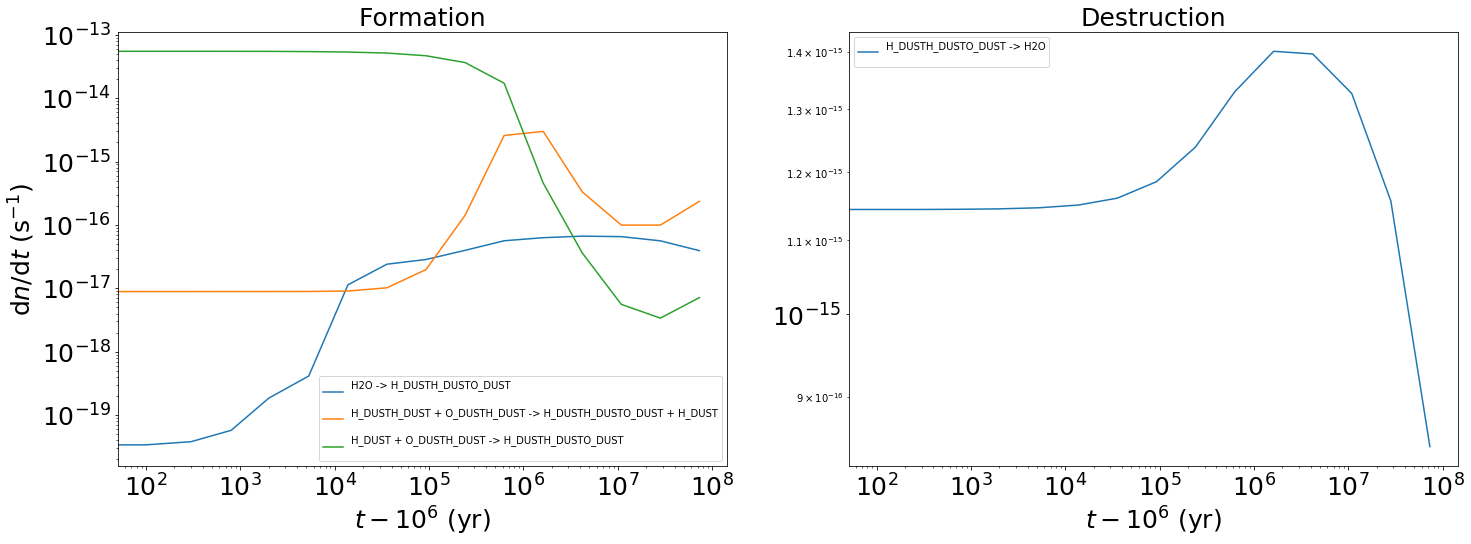

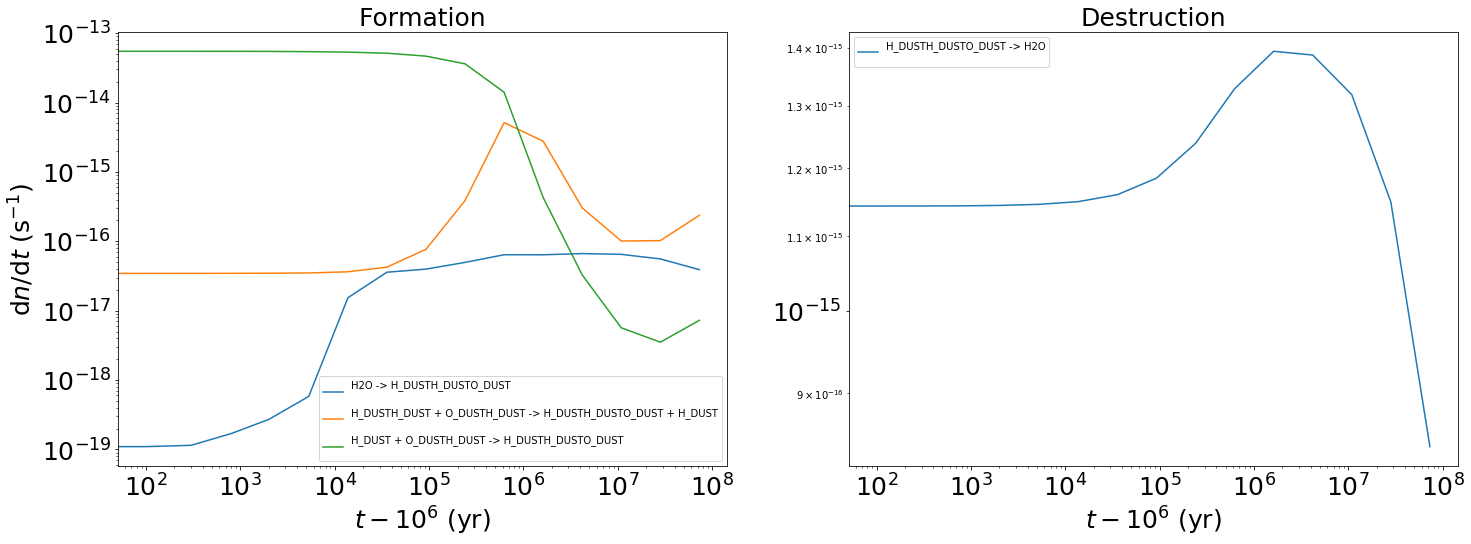

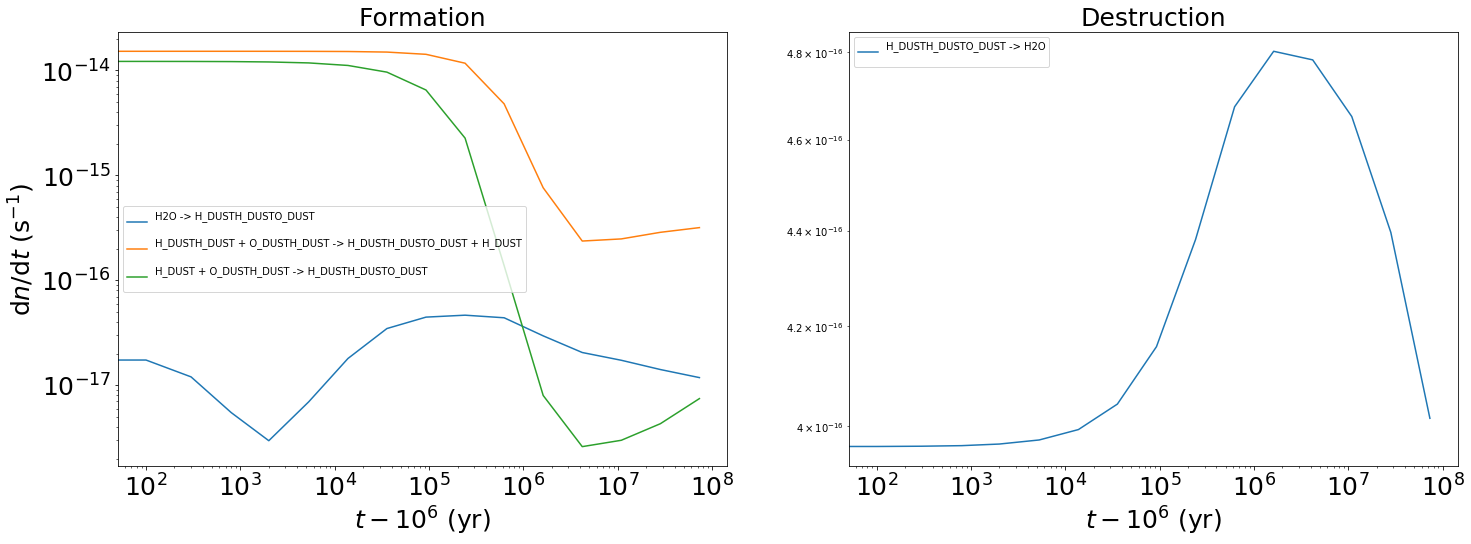

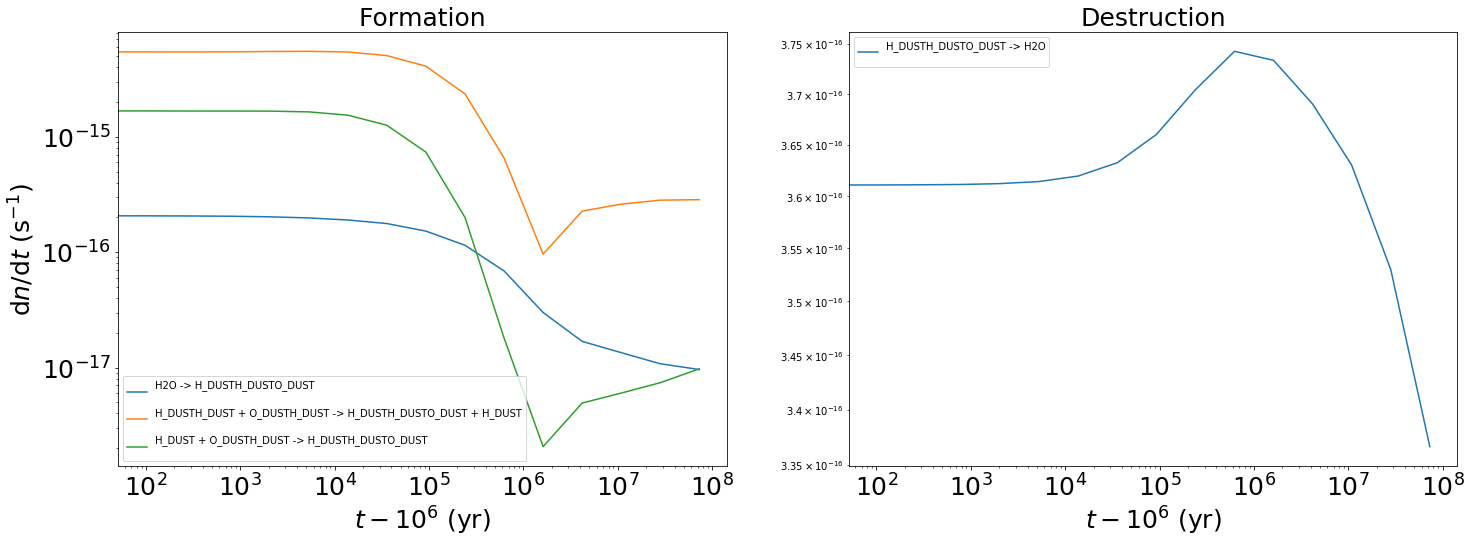

In [111]:
tr201.plot('H_DUSTH_DUSTO_DU', num=3)
tr202.plot('H_DUSTH_DUSTO_DU', num=3)
tr204.plot('H_DUSTH_DUSTO_DU', num=3)
tr208.plot('H_DUSTH_DUSTO_DU', num=3)

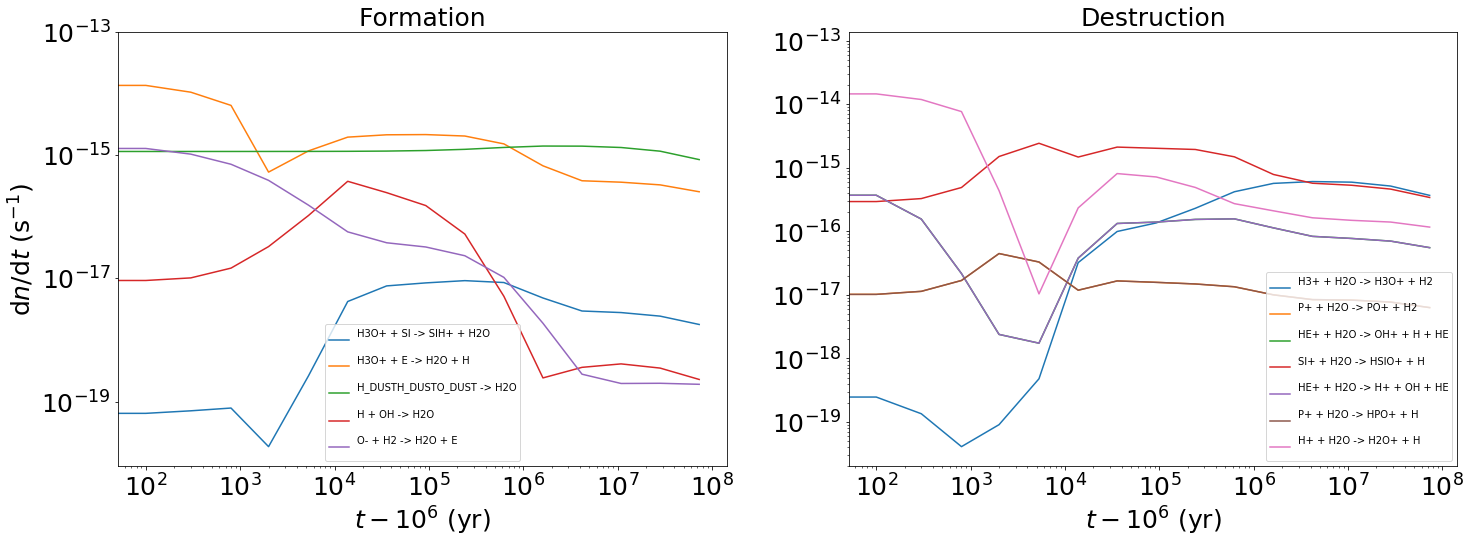

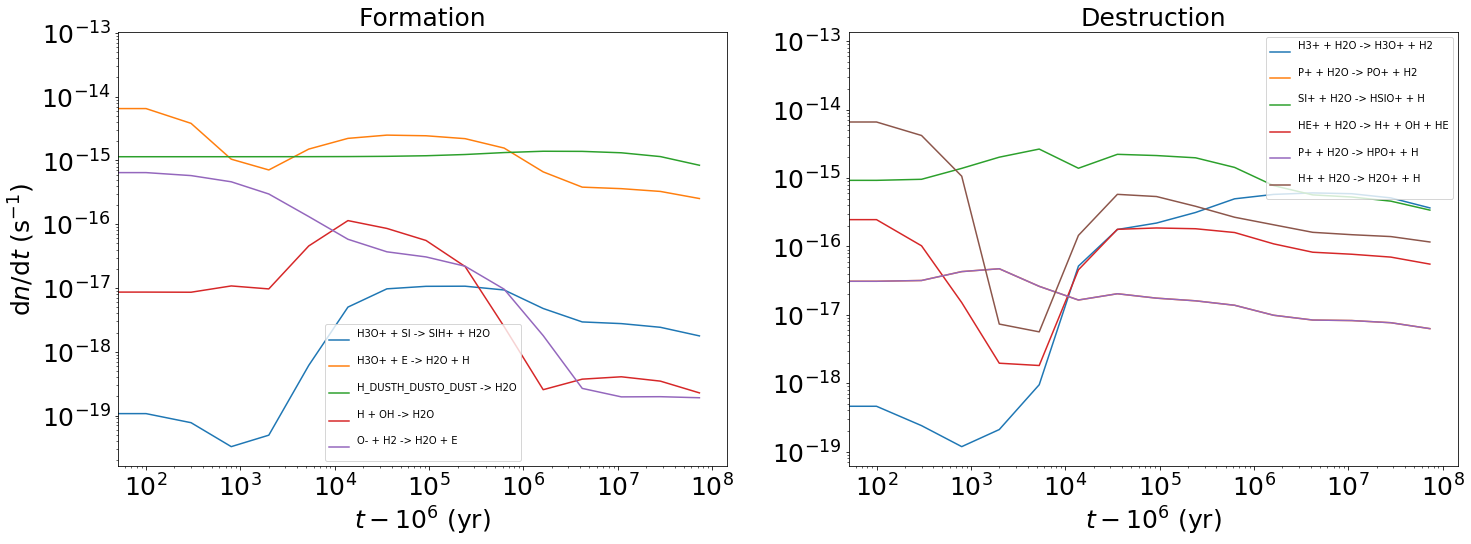

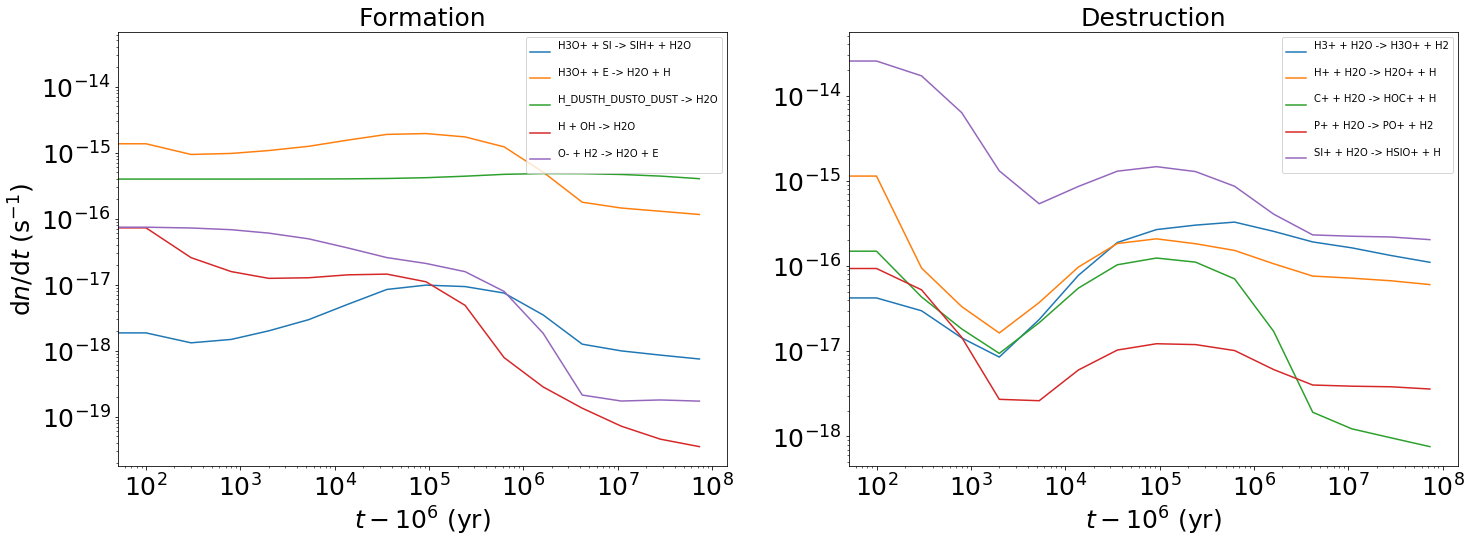

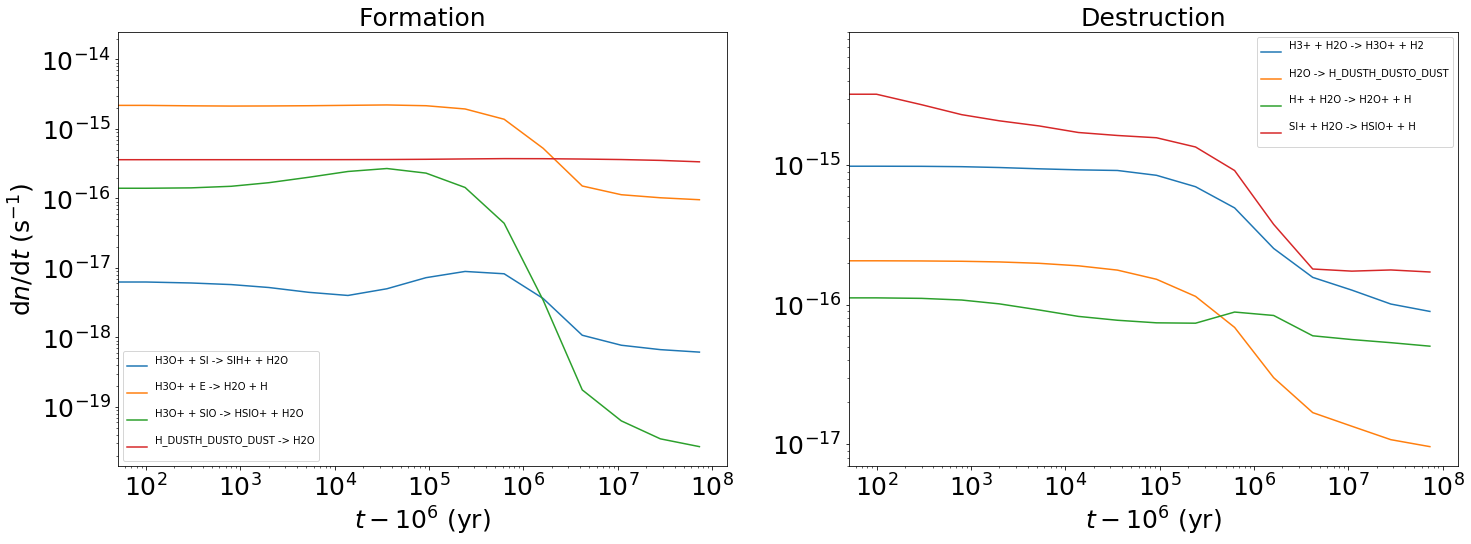

In [107]:
tr201.plot('H2O', num=3)
tr202.plot('H2O', num=3)
tr204.plot('H2O', num=3)
tr208.plot('H2O', num=3)

In [110]:
name

['E',
 'GRAIN-',
 'H-',
 'C-',
 'CN-',
 'O-',
 'OH-',
 'S-',
 'GRAIN0',
 'C',
 'FE',
 'H',
 'HE',
 'MG',
 'N',
 'NA',
 'O',
 'S',
 'SI',
 'H2',
 'CO',
 'CL',
 'P',
 'C2',
 'CCL',
 'CH',
 'CLO',
 'CN',
 'CP',
 'CS',
 'HCL',
 'HF',
 'F',
 'HS',
 'MGH',
 'N2',
 'NAH',
 'NH',
 'NO',
 'NS',
 'O2',
 'OH',
 'PH',
 'PN',
 'PO',
 'S2',
 'SIC',
 'SIH',
 'SIN',
 'SIO',
 'SIS',
 'SO',
 'C2H',
 'C2N',
 'C2S',
 'C3',
 'CCO',
 'CCP',
 'CH2',
 'CO2',
 'H2O',
 'H2S',
 'HCN',
 'HCO',
 'HCP',
 'HCS',
 'HCSI',
 'HNC',
 'HNO',
 'HNSI',
 'HPO',
 'HS2',
 'N2O',
 'NAOH',
 'NH2',
 'NO2',
 'O2H',
 'OCN',
 'OCS',
 'PH2',
 'SIC2',
 'SIH2',
 'SINC',
 'SIO2',
 'SO2',
 'C2H2',
 'C3H',
 'HC3',
 'C3N',
 'C3O',
 'C3P',
 'C3S',
 'C4',
 'CH3',
 'H2CO',
 'H2CS',
 'H2O2',
 'H2S2',
 'H2SIO',
 'HCCP',
 'NH3',
 'SIC2H',
 'SIC3',
 'SICH2',
 'SIH3',
 'C2H2N',
 'C2H2O',
 'C2H3',
 'C3H2',
 'H2C3',
 'C4H',
 'C4N',
 'C4P',
 'C4S',
 'C5',
 'CH2O2',
 'CH2PH',
 'CH3N',
 'CH4',
 'HC3N',
 'SIC2H2',
 'SIC3H',
 'SIC4',
 'SICH3',
 'SIH4',
